In [3]:
!gdown 1PBZ01wSMsmjjL1swNwbsJEWdbXIFRcVt

Downloading...
From: https://drive.google.com/uc?id=1PBZ01wSMsmjjL1swNwbsJEWdbXIFRcVt
To: /content/conv_2048crop_768_binary_dataset .zip
100% 3.18G/3.18G [00:16<00:00, 191MB/s]


In [ ]:
!gdown 1-MTd-DSPCcT0YHJPLiUx59WKCtaH5c6Z
!gdown 1-8Teo0EZ4ETt__5wsau5LujrFC-puhBr
!gdown 1Fy6Pa04Ro9817ptG1CMItHyWGpSBZVj3
!gdown 1-9_wQE0Ib2btAoVsxhqUY1uhwrYQGhXg
!gdown 1-LNO9cJ4gfqiVESnmOxJCNU7i29Z7Us8

Downloading...
From: https://drive.google.com/uc?id=1-MTd-DSPCcT0YHJPLiUx59WKCtaH5c6Z
To: /content/2048_crop_dataset.zip
100% 2.96G/2.96G [00:23<00:00, 125MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-8Teo0EZ4ETt__5wsau5LujrFC-puhBr
To: /content/all_256x256_partition_dataset.zip
100% 2.95G/2.95G [00:27<00:00, 107MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Fy6Pa04Ro9817ptG1CMItHyWGpSBZVj3
To: /content/all_512x512_partition_dataset.zip
100% 2.95G/2.95G [00:22<00:00, 130MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1-9_wQE0Ib2btAoVsxhqUY1uhwrYQGhXg
To: /content/exist_256x256_partition_dataset.zip
100% 1.17G/1.17G [00:10<00:00, 113MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1-LNO9cJ4gfqiVESnmOxJCNU7i29Z7Us8
To: /content/exist_512x512_partition_dataset.zip
100% 1.64G/1.64G [00:11<00:00, 143MB/s]


In [ ]:
!unzip /content/2048_crop_dataset.zip
!unzip /content/all_256x256_partition_dataset.zip
!unzip /content/all_512x512_partition_dataset.zip
!unzip /content/exist_256x256_partition_dataset.zip
!unzip /content/exist_512x512_partition_dataset.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: exist_512x512_partition_dataset/images/18426_012.png  
  inflating: exist_512x512_partition_dataset/images/19048_016.png  
  inflating: exist_512x512_partition_dataset/images/31406_005.png  
  inflating: exist_512x512_partition_dataset/images/13396_001.png  
  inflating: exist_512x512_partition_dataset/images/8752_006.png  
  inflating: exist_512x512_partition_dataset/images/15499_008.png  
  inflating: exist_512x512_partition_dataset/images/14407_003.png  
  inflating: exist_512x512_partition_dataset/images/18445_016.png  
  inflating: exist_512x512_partition_dataset/images/27471_013.png  
  inflating: exist_512x512_partition_dataset/images/6730_013.png  
  inflating: exist_512x512_partition_dataset/images/27587_015.png  
  inflating: exist_512x512_partition_dataset/images/22310_005.png  
  inflating: exist_512x512_partition_dataset/images/18900_006.png  
  inflating: exist_512x512_partition_dataset/images/676_009.png  
  inflating: exi

In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import seaborn
from tqdm.notebook import tqdm

In [ ]:
main_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/alpaco/main_project/kaggle/restart/train.csv')
main_data

,id,organ,data_source,img_height,img_width,pixel_size,tissue_thickness,rle,age,sex
0,10044,prostate,HPA,3000,3000,0.4,4,1459676 77 1462675 82 1465674 87 1468673 92 14...,37.0,Male
1,10274,prostate,HPA,3000,3000,0.4,4,715707 2 718705 8 721703 11 724701 18 727692 3...,76.0,Male
2,10392,spleen,HPA,3000,3000,0.4,4,1228631 20 1231629 24 1234624 40 1237623 47 12...,82.0,Male
3,10488,lung,HPA,3000,3000,0.4,4,3446519 15 3449517 17 3452514 20 3455510 24 34...,78.0,Male
4,10610,spleen,HPA,3000,3000,0.4,4,478925 68 481909 87 484893 105 487863 154 4908...,21.0,Female
...,...,...,...,...,...,...,...,...,...,...
346,9517,kidney,HPA,3000,3000,0.4,4,1611763 11 1614753 29 1617750 35 1620746 43 16...,61.0,Male
347,9769,kidney,HPA,3070,3070,0.4,4,4030400 28 4033466 34 4036526 48 4039594 54 40...,28.0,Male
348,9777,largeintestine,HPA,3000,3000,0.4,4,538473 13 541468 22 544463 30 547461 35 550459...,84.0,Male
349,9791,kidney,HPA,3000,3000,0.4,4,334733 33 337729 43 340729 43 343725 51 346723...,28.0,Male


# Data counter

## Class counter function

In [ ]:
def class_counter(path):
    classes = ['background', 'kidney', 'prostate', 'largeintestine', 'spleen', 'lung']

    counter = {
        'background' : 0,
        'kidney' : 0,
        'prostate' : 0,
        'largeintestine' : 0,
        'spleen' : 0,
        'lung' : 0,
        'total' : 0
    }

    file_name = os.listdir(path)

    for names in file_name:

        mask_img = cv2.imread(path + f'/{names}')
        class_name = classes[mask_img.max()]

        counter[class_name] += 1
        counter['total'] += 1
        
    return counter

In [ ]:
count1 = class_counter('/content/2048_crop_dataset/multi_masks')
count2 = class_counter('/content/all_256x256_partition_dataset/multi_masks')
count3 = class_counter('/content/all_512x512_partition_dataset/multi_masks')

In [ ]:
count1_df = pd.DataFrame(count1, index = ['2048_crop_dataset'])
count2_df = pd.DataFrame(count2, index = ['all_256x256_partition_dataset'])
count3_df = pd.DataFrame(count3, index = ['all_512x512_partition_dataset'])

In [ ]:
pd.concat((count1_df, count2_df, count3_df), axis=0) 

,background,kidney,prostate,largeintestine,spleen,lung,total
2048_crop_dataset,0,99,93,58,53,48,351
all_256x256_partition_dataset,13701,1093,3236,2695,1188,551,22464
all_512x512_partition_dataset,2504,560,1053,780,447,272,5616


In [ ]:
def filter_data(path):

    file_name = os.listdir(path)

    name_list = []
    for names in tqdm(file_name):

        mask_img = cv2.imread(path + f'/{names}')
        mask_img = np.array(mask_img)
        
        mask_img_f = mask_img.flatten()

        all_len = len(mask_img_f)
        mask_len = len(mask_img_f[mask_img_f != 0])

        if 0 < (mask_len / all_len) <= 0.95:
            name_list.append(names)
    return name_list

In [ ]:
name_list = filter_data('/content/all_256x256_partition_dataset/multi_masks')
len(name_list)

  0%|          | 0/22464 [00:00<?, ?it/s]

8127

## Make new dataset

### 

## Test

In [ ]:
test_a = cv2.imread('/content/exist_512x512_partition_dataset/multi_masks/10044_004.png')
test_a = np.array(test_a)
test_a_f = test_a.flatten()
len(test_a_f), len(test_a_f[test_a_f == 0]), len(test_a_f[test_a_f != 0])

(786432, 649179, 137253)

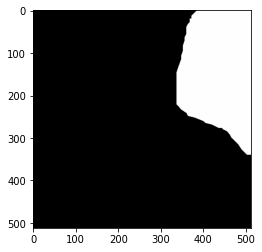

In [ ]:
plt.imshow(test_a * 255)